In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
DATASET_PATH = "/content/drive/MyDrive/Bird_Only.v1i.yolov11/data.yaml"
DATASET_PATH

'/content/drive/MyDrive/Bird_Only.v1i.yolov11/data.yaml'

In [3]:
!pip install ultralytics
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.8 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Entraîner YOLOv11

In [5]:
import time

start_time = time.time()

model = YOLO("yolo11n.pt")  # ou "yolo11s.pt" si GPU plus puissant

results = model.train(
    data=DATASET_PATH,
    epochs=20,
    imgsz=640,
    batch=16,
    name="bird_v11_train"
)

end_time = time.time()

print(f"\n⏱️ Temps total d'entraînement : { (end_time - start_time)/60:.2f} minutes")

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Bird_Only.v1i.yolov11/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=bird_v11_train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100,

YOLOv11n — 20 epochs

- Précision (P) : 0.733

Sur 100 prédictions positives, ~73 sont correctes.

- Recall (R) : 0.706

Le modèle détecte ~70% de tous les oiseaux présents.

- mAP50 : 0.743

Score très solide pour YOLO11n, surtout en only-20 epochs.

- mAP50-95 : 0.399

Excellent pour un modèle aussi petit.


## Sauvegarder automatiquement le modèle

In [7]:
import shutil

SOURCE = "/content/runs/detect/bird_v11_train2/weights/best.pt"
DEST = "/content/drive/MyDrive/bird_v11n_best_ep20.pt"

shutil.copy(SOURCE, DEST)

print("✔️ Modèle sauvegardé dans le Drive :", DEST)

✔️ Modèle sauvegardé dans le Drive : /content/drive/MyDrive/bird_v11n_best_ep20.pt


## Tester une image

In [9]:
!ls /content/drive/MyDrive

'Albane COIFFE_Documents.pdf'
'Analyse des données DVF.gslides'
'Attestation_sécurité_sociale_Albane Coiffe.pdf'
 Bird_Only.v1i.yolov11
 bird_v11n_best_ep20.pt
'Colab Notebooks'
 Data-20251126
'data management and ethics.gdoc'
 DSC_0361.JPG
 hawk-data.gdoc
 IMG_0004.JPG
 IMG_5435.MOV
"Les crets d'eau.docx"
"Les crets d'eau.pages"
 model2.pt
 OneDrive_2023-12-04.zip
"pièce d'identité - Albane COIFFE.pdf"
 PKLot_cleaned
 PSX_20210417_235931.jpg
'Rapport de progression.gslides'
"Rapport d'etonnement.pages"
'Rapport stage.gdoc'
'rapport v2.gdoc'


In [10]:
!ls /content/runs/detect/bird_v11_train2/weights/

best.pt  last.pt


In [11]:
model = YOLO("/content/drive/MyDrive/bird_v11n_best_ep20.pt")

(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

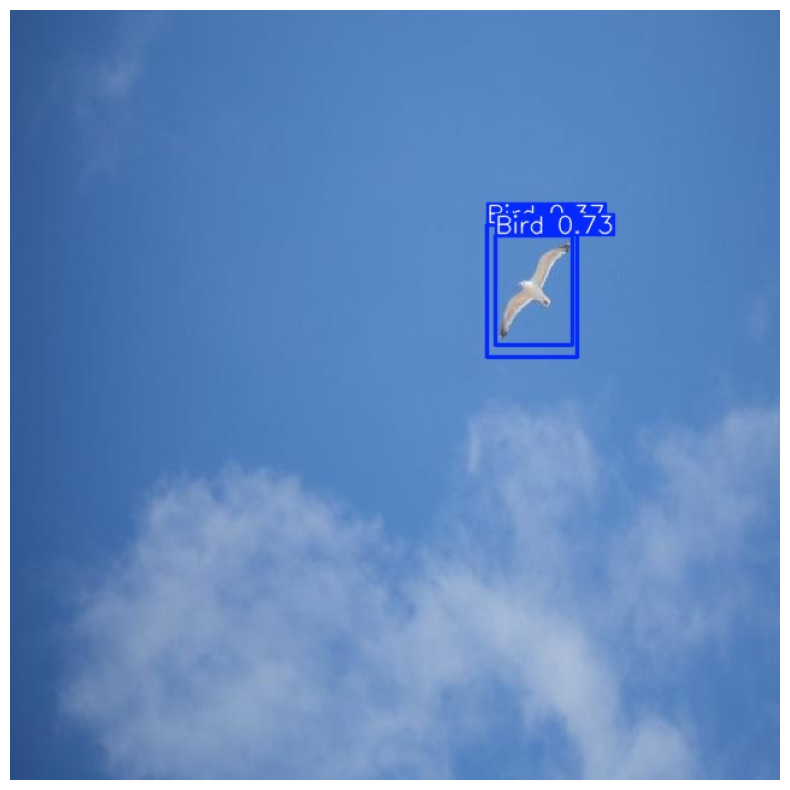

In [19]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("/content/runs/detect/predict/1_jpg.rf.77c92edbdcd2e8c9f2c06cff629ef65a.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('off')

(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

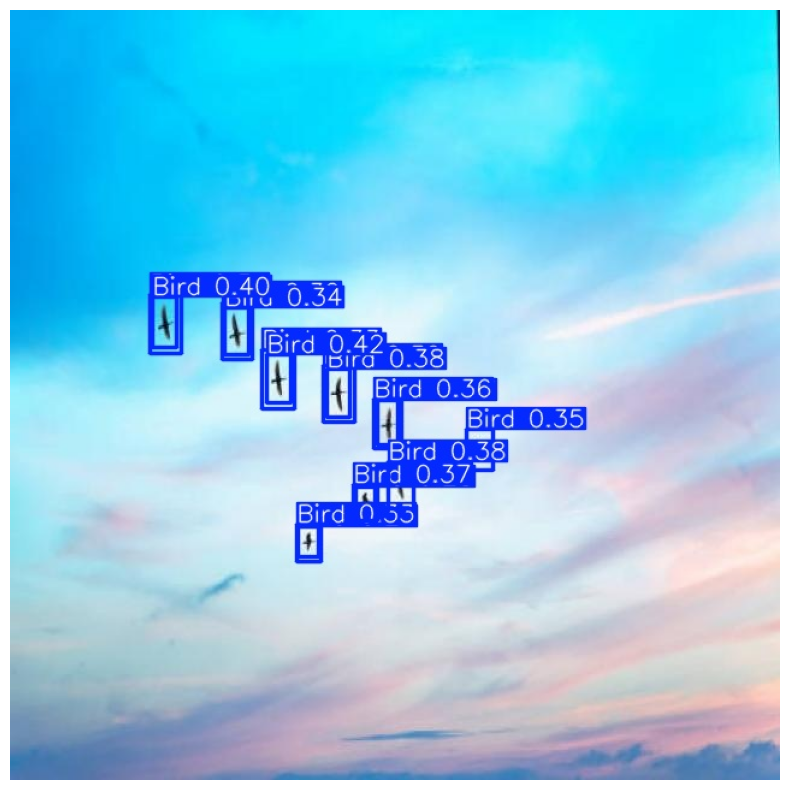

In [20]:
img = cv2.imread("/content/runs/detect/predict/6_jpg.rf.3bc2612b255a78462890cda3fafa557b.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('off')